<a href="https://colab.research.google.com/github/diego-s-fernandes/acoesnaoorcamentarias/blob/main/tratamento_grafico_anor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerando o gráfico de contagem de ações...


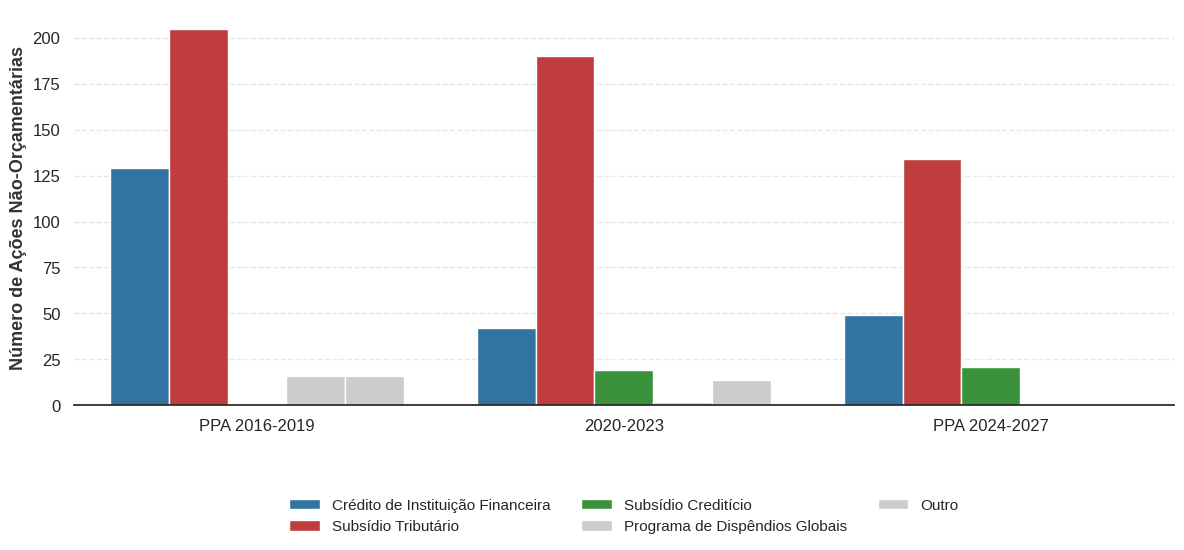

Gráfico de contagem de ações gerado e salvo como 'grafico_contagem_acoes.png' e 'grafico_contagem_acoes.svg'.


In [21]:
print("Gerando o gráfico de contagem de ações...")

# 1. Crie uma figura e um eixo para o gráfico
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})
fig, ax = plt.subplots(figsize=(12, 7))

# Definição das Cores - ATUALIZADO para destacar 'Subsídio Creditício'
light_gray = '#CCCCCC'
palette = {
    'Subsídio Tributário': '#d62728',               # Vermelho
    'Crédito de Instituição Financeira': '#1f77b4', # Azul
    'Subsídio Creditício': '#2ca02c',               # Novo: um tom de verde para Subsídio Creditício
    'Outro': light_gray,
    'Programa de Dispêndios Globais': light_gray,
    'Outros': light_gray # Prevenção caso a grafia mude
}

# 2. Gere um gráfico de barras
sns.barplot(
    data=df_acao_count,
    x='Plano',
    y='Contagem de Ações',
    hue='Tipo',
    palette=palette,
    ax=ax
)

# 3. Defina o rótulo do eixo Y e remova o rótulo do eixo X
ax.set_ylabel('Número de Ações Não-Orçamentárias', fontsize=13, weight='bold', color='#333333')
ax.set_xlabel('')

# 4. Ajuste as configurações do eixo e remova as linhas da grade
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555')
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')

# 5. Adicione um título ao gráfico
#ax.set_title('Contagem de Ações Não-Orçamentárias por Tipo e Plano', fontsize=16, weight='bold', color='#333333', pad=20)

# 6. Posicione a legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=11)

# 7. Adicione a fonte dos dados no rodapé
#plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
            #fontsize=11, color='#777777', ha='left')

# 8. Ajuste o layout do gráfico
plt.tight_layout(rect=[0, 0.1, 1, 0.95]) # Ajustado rect para acomodar a legenda e o título

# 9. Salve o gráfico nos formatos PNG e SVG
plt.savefig('grafico_contagem_acoes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_contagem_acoes.svg', bbox_inches='tight', facecolor='white')

# 10. Exiba o gráfico
plt.show()

print("Gráfico de contagem de ações gerado e salvo como 'grafico_contagem_acoes.png' e 'grafico_contagem_acoes.svg'.")

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Iniciando processamento dos dados...
Arquivos carregados com sucesso.


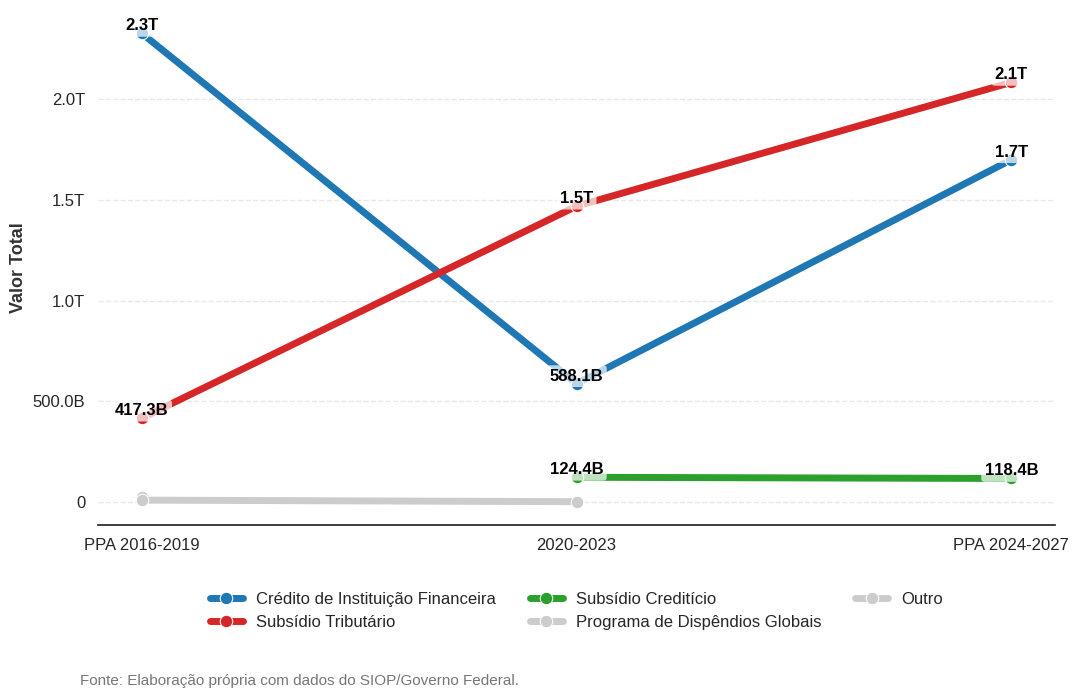

Gráfico gerado e salvo como 'grafico_final_ajustado.png' e 'grafico_final_ajustado.svg'.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1. Carregamento e Preparação dos Dados ---
print("Iniciando processamento dos dados...")

try:
    # Carregamento dos arquivos
    # Certifique-se de ter feito o upload destes arquivos na aba lateral do Colab
    # Ou que eles estão no diretório correto, como '/content/drive/MyDrive/' se estiver usando o Drive
    df_2024 = pd.read_excel('anor-2024.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    df_2020_2023 = pd.read_excel('anor-2020-2023.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    df_2016_2019 = pd.read_excel('anor-2016-2019.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    print("Arquivos carregados com sucesso.")
except FileNotFoundError as e:
    print(f"Erro: {e}. Verifique se os nomes dos arquivos estão corretos e se foram enviados.")

# Seleção de colunas e unificação
cols = ['Valor Total', 'Tipo', 'Plano']
# O uso de .copy() previne avisos de SettingWithCopyWarning
df_combined = pd.concat([df_2024[cols].copy(), df_2020_2023[cols].copy(), df_2016_2019[cols].copy()], ignore_index=True)

# Agrupamento e Soma
grouped_df = df_combined.groupby(['Tipo', 'Plano'])['Valor Total'].sum().reset_index()

# --- Novo ajuste: Ordenar 'Tipo' pela soma total para a legenda ---
type_order = grouped_df.groupby('Tipo')['Valor Total'].sum().sort_values(ascending=False).index.tolist()
grouped_df['Tipo'] = pd.Categorical(grouped_df['Tipo'], categories=type_order, ordered=True)

# Ordenação Cronológica do Eixo X
plano_order = ['PPA 2016-2019', '2020-2023', 'PPA 2024-2027']
grouped_df['Plano'] = pd.Categorical(grouped_df['Plano'], categories=plano_order, ordered=True)
grouped_df = grouped_df.sort_values(['Plano', 'Tipo']) # Adicionado 'Tipo' para manter a ordem dentro de cada Plano

# Filtragem: Remover Planos onde o Valor Total é zero (para não plotar)
grouped_df = grouped_df[grouped_df['Valor Total'] > 0]

# --- 2. Visualização e Design ---

# Configuração do Tema
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})

fig, ax = plt.subplots(figsize=(11, 7))

# Definição das Cores
# Destaque (Azul/Vermelho) vs Contexto (Cinza Claro)
light_gray = '#CCCCCC'
palette = {
    'Subsídio Tributário': '#d62728',               # Vermelho
    'Crédito de Instituição Financeira': '#1f77b4', # Azul
    'Subsídio Creditício': '#2ca02c',               # Novo: um tom de verde para Subsídio Creditício
    'Outro': light_gray,
    'Programa de Dispêndios Globais': light_gray,
    'Outros': light_gray # Prevenção caso a grafia mude
}

# Plotagem
sns.lineplot(
    data=grouped_df,
    x='Plano',
    y='Valor Total',
    hue='Tipo',
    palette=palette,
    marker='o',
    markersize=9,
    linewidth=5, # Aumentado de 3 para 5
    ax=ax
)

# Função de formatação para valores monetários (Bilhões/Trilhões)
def human_format_ptbr(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # Alterado: removendo 'R$' e usando 'B'/'T'
    suffixes = ['', 'Mil', 'Mi', 'B', 'T']
    return '%.1f%s' % (num, suffixes[magnitude]) if magnitude > 0 else '%.0f' % num

ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format_ptbr))

# Títulos e Rótulos
ax.set_ylabel('Valor Total', fontsize=13, weight='bold', color='#333333') # Aumentado de 11 para 13
ax.set_xlabel('') # Eixo X autoexplicativo
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555') # Aumentado de 10 para 12

# Limpeza Visual
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')

# Legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, frameon=False, fontsize=12) # Aumentado de 10 para 12

# Adicionar os rótulos aos pontos dos Tipos específicos
specific_types_to_label = ['Subsídio Tributário', 'Crédito de Instituição Financeira', 'Subsídio Creditício']

for tipo_to_label in specific_types_to_label:
    # Filtra os dados para o tipo específico
    df_tipo = grouped_df[grouped_df['Tipo'] == tipo_to_label]

    for index, row in df_tipo.iterrows():
        plano = row['Plano']
        valor_total = row['Valor Total']

        # Obtém as coordenadas x e y para a anotação
        x_coord = plano_order.index(plano)
        y_coord = valor_total
        label_text = human_format_ptbr(y_coord, None) # Formata o valor

        # Adiciona o rótulo ao gráfico, com um pequeno offset vertical
        ax.text(x_coord, y_coord, label_text,
                ha='center', va='bottom', fontsize=12, color='black', weight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Fonte de dados no rodapé
plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
            fontsize=11, color='#777777', ha='left') # Aumentado de 9 para 11

# Ajuste Final e Exibição
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('grafico_final_ajustado.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_final_ajustado.svg', bbox_inches='tight', facecolor='white') # Salva em SVG
plt.show()

print("Gráfico gerado e salvo como 'grafico_final_ajustado.png' e 'grafico_final_ajustado.svg'.")

Iniciando processamento dos dados...
Arquivos carregados com sucesso.


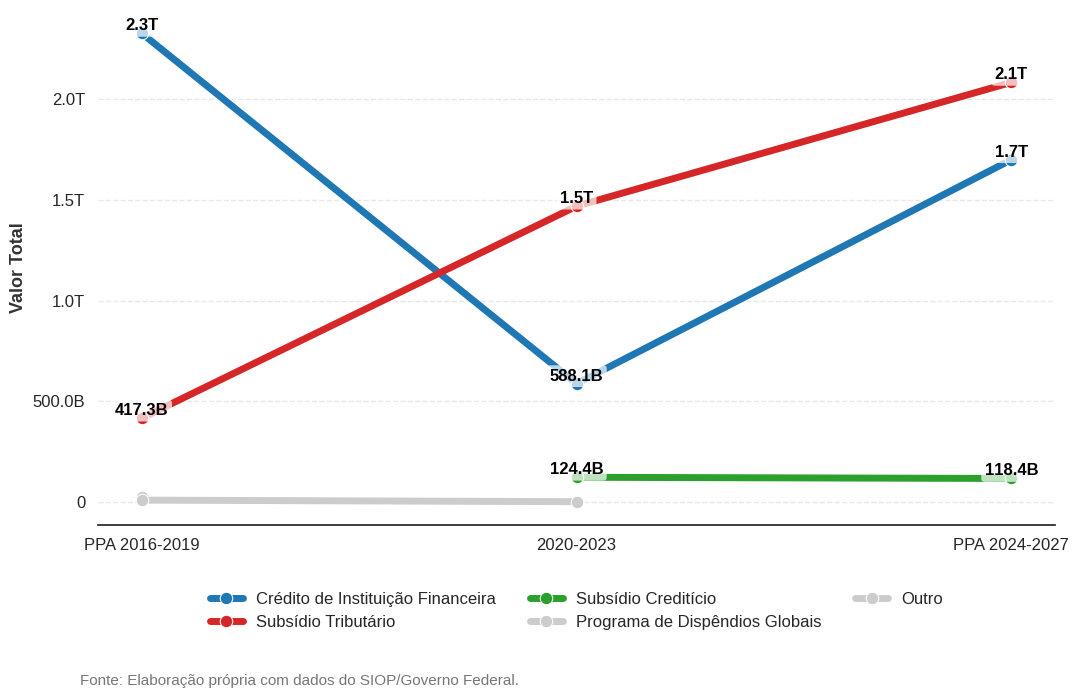

Gráfico gerado e salvo como 'grafico_final_ajustado.png' e 'grafico_final_ajustado.svg'.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# --- 1. Carregamento e Preparação dos Dados ---
print("Iniciando processamento dos dados...")

try:
    # Carregamento dos arquivos
    # Certifique-se de ter feito o upload destes arquivos na aba lateral do Colab
    # Ou que eles estão no diretório correto, como '/content/drive/MyDrive/' se estiver usando o Drive
    df_2024 = pd.read_excel('anor-2024.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    df_2020_2023 = pd.read_excel('anor-2020-2023.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    df_2016_2019 = pd.read_excel('anor-2016-2019.xlsx') # Alterado para read_excel e nome do arquivo ajustado
    print("Arquivos carregados com sucesso.")
except FileNotFoundError as e:
    print(f"Erro: {e}. Verifique se os nomes dos arquivos estão corretos e se foram enviados.")

# Seleção de colunas e unificação
cols = ['Valor Total', 'Tipo', 'Plano']
# O uso de .copy() previne avisos de SettingWithCopyWarning
df_combined = pd.concat([df_2024[cols].copy(), df_2020_2023[cols].copy(), df_2016_2019[cols].copy()], ignore_index=True)

# Agrupamento e Soma
grouped_df = df_combined.groupby(['Tipo', 'Plano'])['Valor Total'].sum().reset_index()

# --- Novo ajuste: Ordenar 'Tipo' pela soma total para a legenda ---
type_order = grouped_df.groupby('Tipo')['Valor Total'].sum().sort_values(ascending=False).index.tolist()
grouped_df['Tipo'] = pd.Categorical(grouped_df['Tipo'], categories=type_order, ordered=True)

# Ordenação Cronológica do Eixo X
plano_order = ['PPA 2016-2019', '2020-2023', 'PPA 2024-2027']
grouped_df['Plano'] = pd.Categorical(grouped_df['Plano'], categories=plano_order, ordered=True)
grouped_df = grouped_df.sort_values(['Plano', 'Tipo']) # Adicionado 'Tipo' para manter a ordem dentro de cada Plano

# Filtragem: Remover Planos onde o Valor Total é zero (para não plotar)
grouped_df = grouped_df[grouped_df['Valor Total'] > 0]

# --- 2. Visualização e Design ---

# Configuração do Tema
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})

fig, ax = plt.subplots(figsize=(11, 7))

# Definição das Cores
# Destaque (Azul/Vermelho) vs Contexto (Cinza Claro)
light_gray = '#CCCCCC'
palette = {
    'Subsídio Tributário': '#d62728',               # Vermelho
    'Crédito de Instituição Financeira': '#1f77b4', # Azul
    'Subsídio Creditício': '#2ca02c',               # Novo: um tom de verde para Subsídio Creditício
    'Outro': light_gray,
    'Programa de Dispêndios Globais': light_gray,
    'Outros': light_gray # Prevenção caso a grafia mude
}

# Plotagem
sns.lineplot(
    data=grouped_df,
    x='Plano',
    y='Valor Total',
    hue='Tipo',
    palette=palette,
    marker='o',
    markersize=9,
    linewidth=5, # Aumentado de 3 para 5
    ax=ax
)

# Função de formatação para valores monetários (Bilhões/Trilhões)
def human_format_ptbr(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # Alterado: removendo 'R$' e usando 'B'/'T'
    suffixes = ['', 'Mil', 'Mi', 'B', 'T']
    return '%.1f%s' % (num, suffixes[magnitude]) if magnitude > 0 else '%.0f' % num

ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format_ptbr))

# Títulos e Rótulos
ax.set_ylabel('Valor Total', fontsize=13, weight='bold', color='#333333') # Aumentado de 11 para 13
ax.set_xlabel('') # Eixo X autoexplicativo
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555') # Aumentado de 10 para 12

# Limpeza Visual
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')

# Legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, frameon=False, fontsize=12) # Aumentado de 10 para 12

# Adicionar os rótulos aos pontos dos Tipos específicos
specific_types_to_label = ['Subsídio Tributário', 'Crédito de Instituição Financeira', 'Subsídio Creditício']

for tipo_to_label in specific_types_to_label:
    # Filtra os dados para o tipo específico
    df_tipo = grouped_df[grouped_df['Tipo'] == tipo_to_label]

    for index, row in df_tipo.iterrows():
        plano = row['Plano']
        valor_total = row['Valor Total']

        # Obtém as coordenadas x e y para a anotação
        x_coord = plano_order.index(plano)
        y_coord = valor_total
        label_text = human_format_ptbr(y_coord, None) # Formata o valor

        # Adiciona o rótulo ao gráfico, com um pequeno offset vertical
        ax.text(x_coord, y_coord, label_text,
                ha='center', va='bottom', fontsize=12, color='black', weight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Fonte de dados no rodapé
plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
            fontsize=11, color='#777777', ha='left') # Aumentado de 9 para 11

# Ajuste Final e Exibição
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('grafico_final_ajustado2.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_final_ajustado2.svg', bbox_inches='tight', facecolor='white') # Salva em SVG
plt.show()

print("Gráfico gerado e salvo como 'grafico_final_ajustado.png' e 'grafico_final_ajustado.svg'.")

**Reasoning**:
The subtask requires creating a new dataframe by combining specific columns from existing dataframes, then grouping by 'Tipo' and 'Plano' to count unique 'Ação Não-Orçamentária' values, and finally ordering the result. This can be achieved in a single Python code block.



In [25]:
print("Criando e processando o DataFrame para contagem de ações...")

# 1. Crie uma lista com as colunas a serem extraídas
cols_count = ['Tipo', 'Plano', 'Ação Não-Orçamentária']

# 2. Selecione as colunas de cada DataFrame e concatene-os
# Certifique-se de que a coluna 'Ação Não-Orçamentária' existe em todos os dataframes, ou ajusta o nome conforme necessário.
# Assumindo que 'Ação Não-Orçamentária' é o nome correto em todos os DFs.

df_combined_for_count = pd.concat([
    df_2024[cols_count].copy(),
    df_2020_2023[cols_count].copy(),
    df_2016_2019[cols_count].copy()
], ignore_index=True)

# 3. Agrupe e conte o número de valores únicos em 'Ação Não-Orçamentária'
df_acao_count = df_combined_for_count.groupby(['Tipo', 'Plano'])['Ação Não-Orçamentária'].nunique().reset_index()

# 4. Renomeie a coluna de contagem
df_acao_count.rename(columns={'Ação Não-Orçamentária': 'Contagem de Ações'}, inplace=True)

# 5. Ordene o novo DataFrame de contagens
# Reutilizando plano_order e type_order definidos anteriormente
df_acao_count['Plano'] = pd.Categorical(df_acao_count['Plano'], categories=plano_order, ordered=True)
df_acao_count['Tipo'] = pd.Categorical(df_acao_count['Tipo'], categories=type_order, ordered=True)

df_acao_count = df_acao_count.sort_values(['Plano', 'Tipo'])

print("DataFrame de contagem de ações criado com sucesso.")
print(df_acao_count.head())

Criando e processando o DataFrame para contagem de ações...
DataFrame de contagem de ações criado com sucesso.
                                 Tipo          Plano  Contagem de Ações
1   Crédito de Instituição Financeira  PPA 2016-2019                129
10                Subsídio Tributário  PPA 2016-2019                205
6      Programa de Dispêndios Globais  PPA 2016-2019                 16
4                               Outro  PPA 2016-2019                 16
0   Crédito de Instituição Financeira      2020-2023                 42


**Reasoning**:
The subtask requires visualizing the `df_acao_count` data using a bar chart with specific styling and saving options. This code block will generate the plot as instructed.



Gerando o gráfico de contagem de ações...


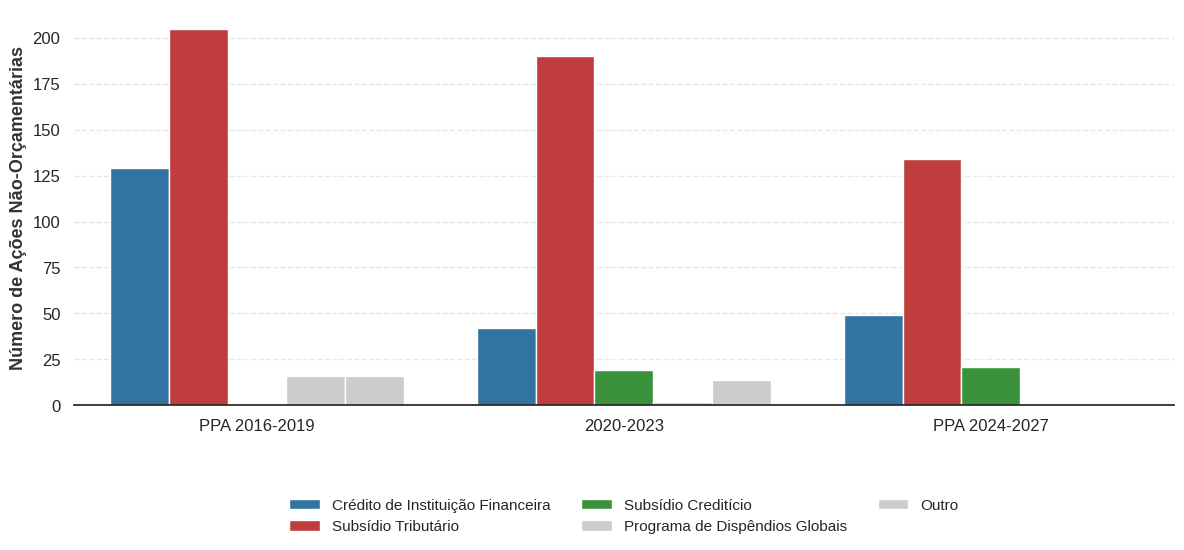

Gráfico de contagem de ações gerado e salvo como 'grafico_contagem_acoes.png' e 'grafico_contagem_acoes.svg'.


In [26]:
print("Gerando o gráfico de contagem de ações...")

# 1. Crie uma figura e um eixo para o gráfico
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})
fig, ax = plt.subplots(figsize=(12, 7))

# Definição das Cores - ATUALIZADO para destacar 'Subsídio Creditício'
light_gray = '#CCCCCC'
palette = {
    'Subsídio Tributário': '#d62728',               # Vermelho
    'Crédito de Instituição Financeira': '#1f77b4', # Azul
    'Subsídio Creditício': '#2ca02c',               # Novo: um tom de verde para Subsídio Creditício
    'Outro': light_gray,
    'Programa de Dispêndios Globais': light_gray,
    'Outros': light_gray # Prevenção caso a grafia mude
}

# 2. Gere um gráfico de barras
sns.barplot(
    data=df_acao_count,
    x='Plano',
    y='Contagem de Ações',
    hue='Tipo',
    palette=palette,
    ax=ax
)

# 3. Defina o rótulo do eixo Y e remova o rótulo do eixo X
ax.set_ylabel('Número de Ações Não-Orçamentárias', fontsize=13, weight='bold', color='#333333')
ax.set_xlabel('')

# 4. Ajuste as configurações do eixo e remova as linhas da grade
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555')
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')

# 5. Adicione um título ao gráfico
#ax.set_title('Contagem de Ações Não-Orçamentárias por Tipo e Plano', fontsize=16, weight='bold', color='#333333', pad=20)

# 6. Posicione a legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=11)

# 7. Adicione a fonte dos dados no rodapé
#plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
            #fontsize=11, color='#777777', ha='left')

# 8. Ajuste o layout do gráfico
plt.tight_layout(rect=[0, 0.1, 1, 0.95]) # Ajustado rect para acomodar a legenda e o título

# 9. Salve o gráfico nos formatos PNG e SVG
plt.savefig('grafico_contagem_acoes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_contagem_acoes.svg', bbox_inches='tight', facecolor='white')

# 10. Exiba o gráfico
plt.show()

print("Gráfico de contagem de ações gerado e salvo como 'grafico_contagem_acoes.png' e 'grafico_contagem_acoes.svg'.")

Gerando o gráfico de contagem de ações com proporções...


/tmp/ipython-input-3029131868.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_acoes_por_plano = df_for_plot_and_labels.groupby('Plano')['Contagem de Ações'].transform('sum')
/tmp/ipython-input-3029131868.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  actual_plotted_types_order = df_for_plot_and_labels.groupby('Tipo')['Contagem de Ações'].sum().sort_values(ascending=False).index.tolist()


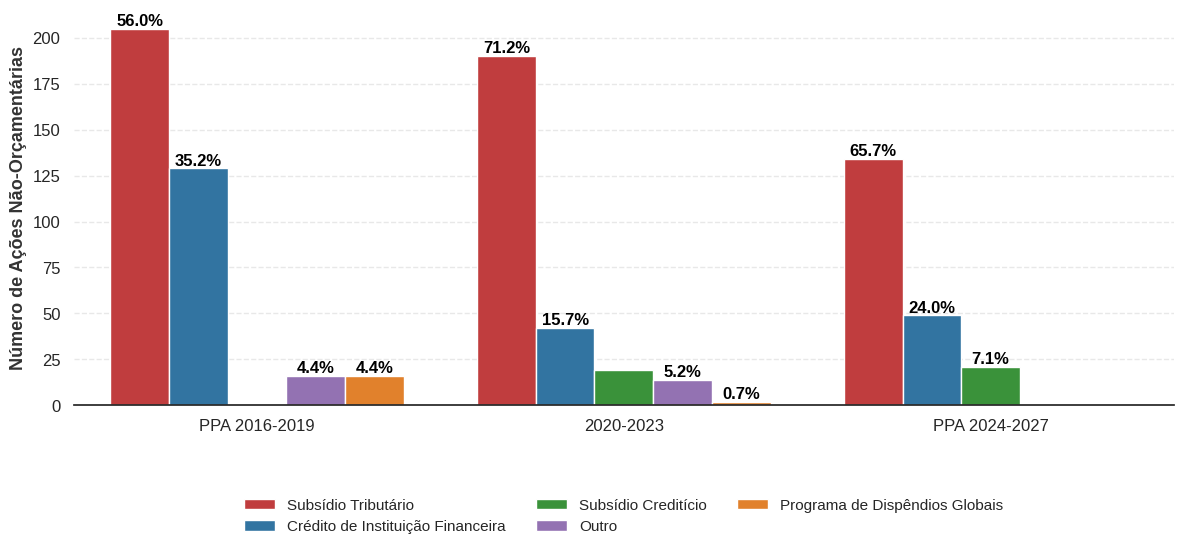

Gráfico de contagem de ações com proporções gerado e salvo como 'grafico_contagem_acoes_com_proporcoes.png' e 'grafico_contagem_acoes_com_proporcoes.svg'.


In [27]:
print("Gerando o gráfico de contagem de ações com proporções...")

# Definição das Cores e Ordens (para tornar a célula autônoma)
# Agora com cores distintas para todas as categorias principais
light_gray = '#CCCCCC'
palette = {
    'Subsídio Tributário': '#d62728',               # Vermelho
    'Crédito de Instituição Financeira': '#1f77b4', # Azul
    'Subsídio Creditício': '#2ca02c',               # Verde
    'Programa de Dispêndios Globais': '#ff7f0e',    # Laranja
    'Outro': '#9467bd',                             # Roxo
    'Outros': '#8c564b'                             # Marrom
}

# Reutilizando plano_order e type_order (do ambiente atual, assumindo que foram definidos)
plano_order = ['PPA 2016-2019', '2020-2023', 'PPA 2024-2027']
# type_order é agora definido dinamicamente abaixo a partir dos dados filtrados

# 1. Calcule as proporções de cada 'Tipo' dentro de cada 'Plano'
df_for_plot_and_labels = df_acao_count.copy()
total_acoes_por_plano = df_for_plot_and_labels.groupby('Plano')['Contagem de Ações'].transform('sum')
df_for_plot_and_labels['Proporcao_Percent'] = (df_for_plot_and_labels['Contagem de Ações'] / total_acoes_por_plano) * 100

# FILTRAGEM: Remover categorias com proporção <= 0% (e, portanto, contagem de ações = 0)
df_for_plot_and_labels = df_for_plot_and_labels[df_for_plot_and_labels['Proporcao_Percent'] > 0].copy()

# Dynamically determine the order of 'Tipo' based on the filtered data
# This ensures that only 'Tipo's that actually have > 0 counts are considered for hue_order
actual_plotted_types_order = df_for_plot_and_labels.groupby('Tipo')['Contagem de Ações'].sum().sort_values(ascending=False).index.tolist()

# Ensure 'Tipo' column in df_for_plot_and_labels is categorical with only the actually plotted types
df_for_plot_and_labels['Tipo'] = pd.Categorical(df_for_plot_and_labels['Tipo'], categories=actual_plotted_types_order, ordered=True)

# 2. Crie uma figura e um eixo para o gráfico
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})
fig, ax = plt.subplots(figsize=(12, 7))

# 3. Gere um gráfico de barras agrupadas (como o grafico_contagem_acoes)
sns.barplot(
    data=df_for_plot_and_labels,
    x='Plano',
    y='Contagem de Ações',
    hue='Tipo',
    palette=palette,
    ax=ax,
    errorbar=None, # Remove a barra de erro, se houver, para um gráfico de contagem simples
    hue_order=actual_plotted_types_order # Pass the dynamically determined order
)

# 4. Defina o rótulo do eixo Y e remova o rótulo do eixo X
ax.set_ylabel('Número de Ações Não-Orçamentárias', fontsize=13, weight='bold', color='#333333')
ax.set_xlabel('')

# 5. Ajuste as configurações do eixo e remova as linhas da grade
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555')
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')

# 6. Adicione um título ao gráfico
#ax.set_title('Contagem e Proporção Relativa de Ações Não-Orçamentárias por Tipo e Plano', fontsize=16, weight='bold', color='#333333', pad=20)

# 7. Posicione a legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=11)

# 8. Adicione os rótulos de proporção (porcentagem) nas barras
# Para garantir a correspondência correta dos rótulos, criaremos um mapa de proporções
proportion_map = df_for_plot_and_labels.set_index(['Plano', 'Tipo'])['Proporcao_Percent'].to_dict()

for container_index, container in enumerate(ax.containers):
    current_tipo = actual_plotted_types_order[container_index] # Usa a ordem dinâmica para identificar o Tipo
    for j, bar in enumerate(container.patches):
        # current_plano deve vir dos ticks do eixo x, que correspondem à ordem do plano_order
        current_plano = plano_order[j] # Identifica o Plano do bar

        percentage = proportion_map.get((current_plano, current_tipo), 0)

        if percentage > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, # Posição X: centro da barra
                bar.get_height(),                  # Posição Y: topo da barra
                f'{percentage:.1f}%',              # String da porcentagem
                ha='center',                       # Alinhamento horizontal
                va='bottom',                       # Alinhamento vertical (acima da barra)
                fontsize=12,                        # Tamanho da fonte
                color='black',                     # Cor do texto
                weight='bold'
            )

# 9. Adicione a fonte dos dados no rodapé (opcional)
# plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
#             fontsize=11, color='#777777', ha='left')

# 10. Ajuste o layout do gráfico
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# 11. Salve o gráfico nos formatos PNG e SVG
plt.savefig('grafico_contagem_acoes_com_proporcoes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_contagem_acoes_com_proporcoes.svg', bbox_inches='tight', facecolor='white')

# 12. Exiba o gráfico
plt.show()

print("Gráfico de contagem de ações com proporções gerado e salvo como 'grafico_contagem_acoes_com_proporcoes.png' e 'grafico_contagem_acoes_com_proporcoes.svg'.")

Gerando o gráfico de proporção relativa de ações...


/tmp/ipython-input-3375872412.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcoes['Total Ações por Plano'] = df_proporcoes.groupby('Plano')['Contagem de Ações'].transform('sum')
/tmp/ipython-input-3375872412.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_proporcoes = df_proporcoes.pivot_table(index='Plano', columns='Tipo', values='Proporcao').fillna(0)


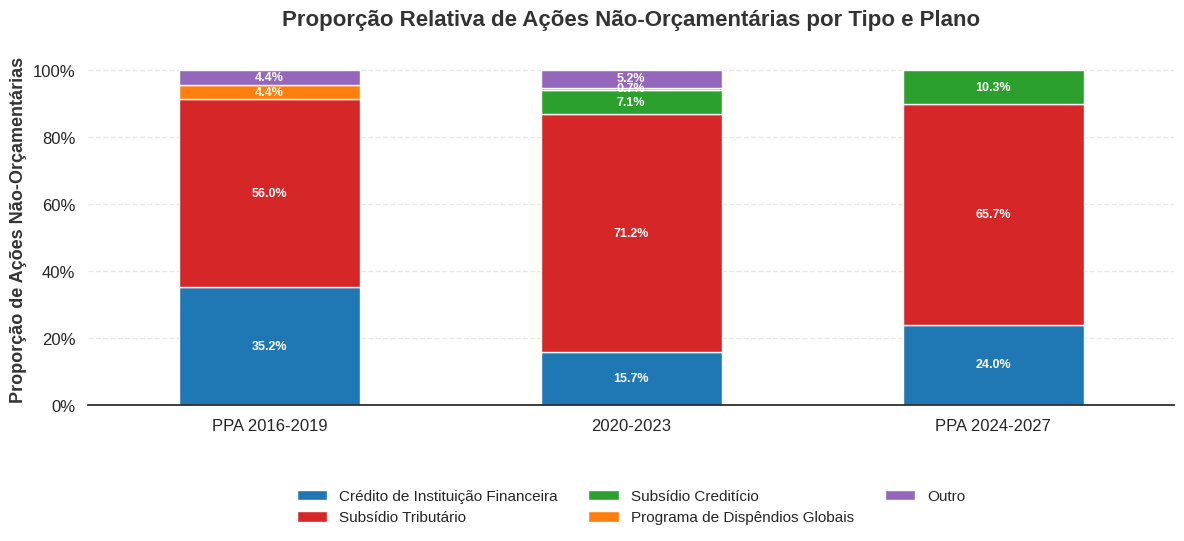

Gráfico de proporção de ações gerado e salvo como 'grafico_proporcao_acoes.png' e 'grafico_proporcao_acoes.svg'.


In [28]:
print("Gerando o gráfico de proporção relativa de ações...")

# 1. Calcule as proporções de cada 'Tipo' dentro de cada 'Plano'
df_proporcoes = df_acao_count.copy()
df_proporcoes['Total Ações por Plano'] = df_proporcoes.groupby('Plano')['Contagem de Ações'].transform('sum')
df_proporcoes['Proporcao'] = df_proporcoes['Contagem de Ações'] / df_proporcoes['Total Ações por Plano']

# 2. Pivote o DataFrame para criar um formato adequado para o gráfico de barras empilhadas
# Use 'type_order' para garantir que os Tipos apareçam na legenda na ordem desejada
df_pivot_proporcoes = df_proporcoes.pivot_table(index='Plano', columns='Tipo', values='Proporcao').fillna(0)
df_pivot_proporcoes = df_pivot_proporcoes[type_order] # Garante a ordem das colunas (Tipos)

# 3. Crie a figura e o eixo para o gráfico
sns.set_theme(style="white", rc={"font.family": "Liberation Sans", "axes.spines.right": False, "axes.spines.top": False})
fig, ax = plt.subplots(figsize=(12, 7))

# 4. Gere um gráfico de barras empilhadas
# Mapeia as cores da paleta original para os Tipos
colors = [palette.get(tipo, light_gray) for tipo in df_pivot_proporcoes.columns]
df_pivot_proporcoes.plot(kind='bar', stacked=True, ax=ax, color=colors)

# 5. Defina o rótulo do eixo Y e remova o rótulo do eixo X
ax.set_ylabel('Proporção de Ações Não-Orçamentárias', fontsize=13, weight='bold', color='#333333')
ax.set_xlabel('')

# 6. Ajuste as configurações do eixo e remova as linhas da grade
ax.tick_params(axis='both', which='major', labelsize=12, color='#555555')
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='lightgrey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Garante que os rótulos do eixo X não girem

# 7. Adicione um título ao gráfico
ax.set_title('Proporção Relativa de Ações Não-Orçamentárias por Tipo e Plano', fontsize=16, weight='bold', color='#333333', pad=20)

# 8. Formate o eixo Y como porcentagem
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1)) # xmax=1 indica que os dados são de 0 a 1

# 9. Posicione a legenda na parte inferior
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=11)

# 10. Adicione os rótulos de proporção (porcentagem) nas barras
for container in ax.containers:
    labels = [f'{h*100:.1f}%' if h > 0 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', weight='bold')

# 11. Adicione a fonte dos dados no rodapé
# plt.figtext(0.08, 0.01, "Fonte: Elaboração própria com dados do SIOP/Governo Federal.",
#             fontsize=11, color='#777777', ha='left')

# 12. Ajuste o layout do gráfico
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# 13. Salve o gráfico nos formatos PNG e SVG
plt.savefig('grafico_proporcao_acoes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('grafico_proporcao_acoes.svg', bbox_inches='tight', facecolor='white')

# 14. Exiba o gráfico
plt.show()

print("Gráfico de proporção de ações gerado e salvo como 'grafico_proporcao_acoes.png' e 'grafico_proporcao_acoes.svg'.")